<a href="https://colab.research.google.com/github/Antonio-Villarreal/Deep-Learning-For-Dummies/blob/main/DeepLizard_PyTorch_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch
!pip install cuda-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 32.2 MB/s eta 0:00:00


In [ ]:
import torch

In [ ]:
import cuda

# Tensor Operations

## Reshaping Operations (Reshape, Squeezing, Flatten)

### Reshaping

In [ ]:
import torch

In [ ]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype = torch.float32)

In [ ]:
t.size()
# tensor dimensions

torch.Size([3, 4])

In [ ]:
t.shape
# tensor dimensions

torch.Size([3, 4])

In [ ]:
len(t.shape)
# 2 axis

2

In [ ]:
torch.tensor(t.shape).prod()
# number of elements

tensor(12)

In [ ]:
t.numel()
# number of elements

12

In [ ]:
# reshape to sizes that have products equal to the total number of elements = 12

In [ ]:
t.reshape(1,12)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])

In [ ]:
t.reshape(6,2)

tensor([[1., 1.],
        [1., 1.],
        [2., 2.],
        [2., 2.],
        [3., 3.],
        [3., 3.]])

In [ ]:
t.reshape(12,1)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [2.],
        [2.],
        [2.],
        [2.],
        [3.],
        [3.],
        [3.],
        [3.]])

In [ ]:
t.reshape(2,2,3)

tensor([[[1., 1., 1.],
         [1., 2., 2.]],

        [[2., 2., 3.],
         [3., 3., 3.]]])

### Squeezing

In [ ]:
print(t.reshape(1,12))
print(t.reshape(1,12).shape)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])


In [ ]:
print(t.reshape(1,12).squeeze())
print(t.reshape(1,12).squeeze().shape)

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])
torch.Size([12])


In [ ]:
print(t.reshape(1,12).squeeze().unsqueeze(dim=0))
print(t.reshape(1,12).squeeze().unsqueeze(dim=0).shape)

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])
torch.Size([1, 12])


### Flattening

In [ ]:
# Flattening a tensor makes a 1D array containing the scalar component (happens been convolution layer to fully connected)

In [ ]:
def flatten(t):
  t = t.reshape(1,-1)
  t = t.squeeze()
  return t

In [ ]:
flatten(t)
# reshape and squeeze

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

In [ ]:
t.reshape(1,12)
# reshape ONLY

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])

### CNN Flatten Operation

In [ ]:
import torch

In [ ]:
t1 = torch.tensor([
  [1,1,1,1],
  [1,1,1,1],
  [1,1,1,1],
  [1,1,1,1]
])

t2 = torch.tensor([
  [2,2,2,2],
  [2,2,2,2],
  [2,2,2,2],
  [2,2,2,2]
])

t3 = torch.tensor([
  [3,3,3,3],
  [3,3,3,3],
  [3,3,3,3],
  [3,3,3,3]
])

In [ ]:
t = torch.stack((t1, t2, t3))
# Tensor is missing one more axis to fit into a CNN
t.shape

torch.Size([3, 4, 4])

In [ ]:
t

tensor([[[1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1],
         [1, 1, 1, 1]],

        [[2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2],
         [2, 2, 2, 2]],

        [[3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3],
         [3, 3, 3, 3]]])

In [ ]:
t = t.reshape(3,1,4,4)
t

tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])

In [ ]:
# Method 1
t.reshape(1,-1)[0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
# Method 2
t.reshape(-1)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
# Method 3
t.view(t.numel())

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
# Method 4 - PyTorch
t.flatten()
# Not correct flattening for CNN

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
# Flatten color channel axis with height and width for model
t.flatten(start_dim=1).shape

torch.Size([3, 16])

In [ ]:
t.flatten(start_dim=1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

## Element-Wise Operations (Arithmetic, Broadcasting, Comparison)

An element-wise operation is an operation between two tensors that operates on corresponding elements with respective tensors. Tensors must have the same size and shape.

In [27]:
import torch
import numpy as np

In [28]:
t1 = torch.tensor([
    [1,2],
    [3,4]
], dtype = torch.float32 )

t2 = torch.tensor([
    [9,8],
    [7,6]
], dtype=torch.float32)

In [29]:
t1[0]

tensor([1., 2.])

In [30]:
t1[0][0]

tensor(1.)

In [31]:
t2[0][0]

tensor(9.)

In [32]:
t1 + t2

tensor([[10., 10.],
        [10., 10.]])

In [33]:
t1 * t2

tensor([[ 9., 16.],
        [21., 24.]])

In [34]:
t1 + 2

tensor([[3., 4.],
        [5., 6.]])

In [35]:
t2 - 2

tensor([[7., 6.],
        [5., 4.]])

In [36]:
t1 * 2

tensor([[2., 4.],
        [6., 8.]])

In [37]:
t1/2

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])

In [38]:
t1.add(2)

tensor([[3., 4.],
        [5., 6.]])

In [39]:
t1.sub(2)

tensor([[-1.,  0.],
        [ 1.,  2.]])

In [40]:
t1.mul(2)

tensor([[2., 4.],
        [6., 8.]])

In [41]:
t1.div(2)

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])

In [42]:
np.broadcast_to(2, t1.shape)

array([[2, 2],
       [2, 2]])

In [43]:
t1 + 2

tensor([[3., 4.],
        [5., 6.]])

In [44]:
t1 + torch.tensor (
    np.broadcast_to(2, t1.shape),
    dtype=torch.float32
)

tensor([[3., 4.],
        [5., 6.]])

In [46]:
t1 = torch.tensor([
    [1,1],
    [1,1]
], dtype=torch.float32)

t2 = torch.tensor([
    [2,4]
], dtype=torch.float32)

In [47]:
t1.shape

torch.Size([2, 2])

In [48]:
t2.shape

torch.Size([1, 2])

In [50]:
# What is t1 + t2?
np.broadcast_to(t2.numpy(), t1.shape)

array([[2., 4.],
       [2., 4.]], dtype=float32)

In [51]:
t1 + t2

tensor([[3., 5.],
        [3., 5.]])

In [63]:
t = torch.tensor([
    [0,-5,7],
    [6,0,7],
    [0,8,0]
], dtype=torch.float32)

In [64]:
t.eq(0)

tensor([[ True, False, False],
        [False,  True, False],
        [ True, False,  True]])

In [65]:
t.ge(0)

tensor([[ True, False,  True],
        [ True,  True,  True],
        [ True,  True,  True]])

In [66]:
t.gt(0)

tensor([[False, False,  True],
        [ True, False,  True],
        [False,  True, False]])

In [67]:
t.lt(0)

tensor([[False,  True, False],
        [False, False, False],
        [False, False, False]])

In [68]:
# Less Than or Equal to
t.le(7)

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [ True, False,  True]])

The below function calls equals the single above operation:

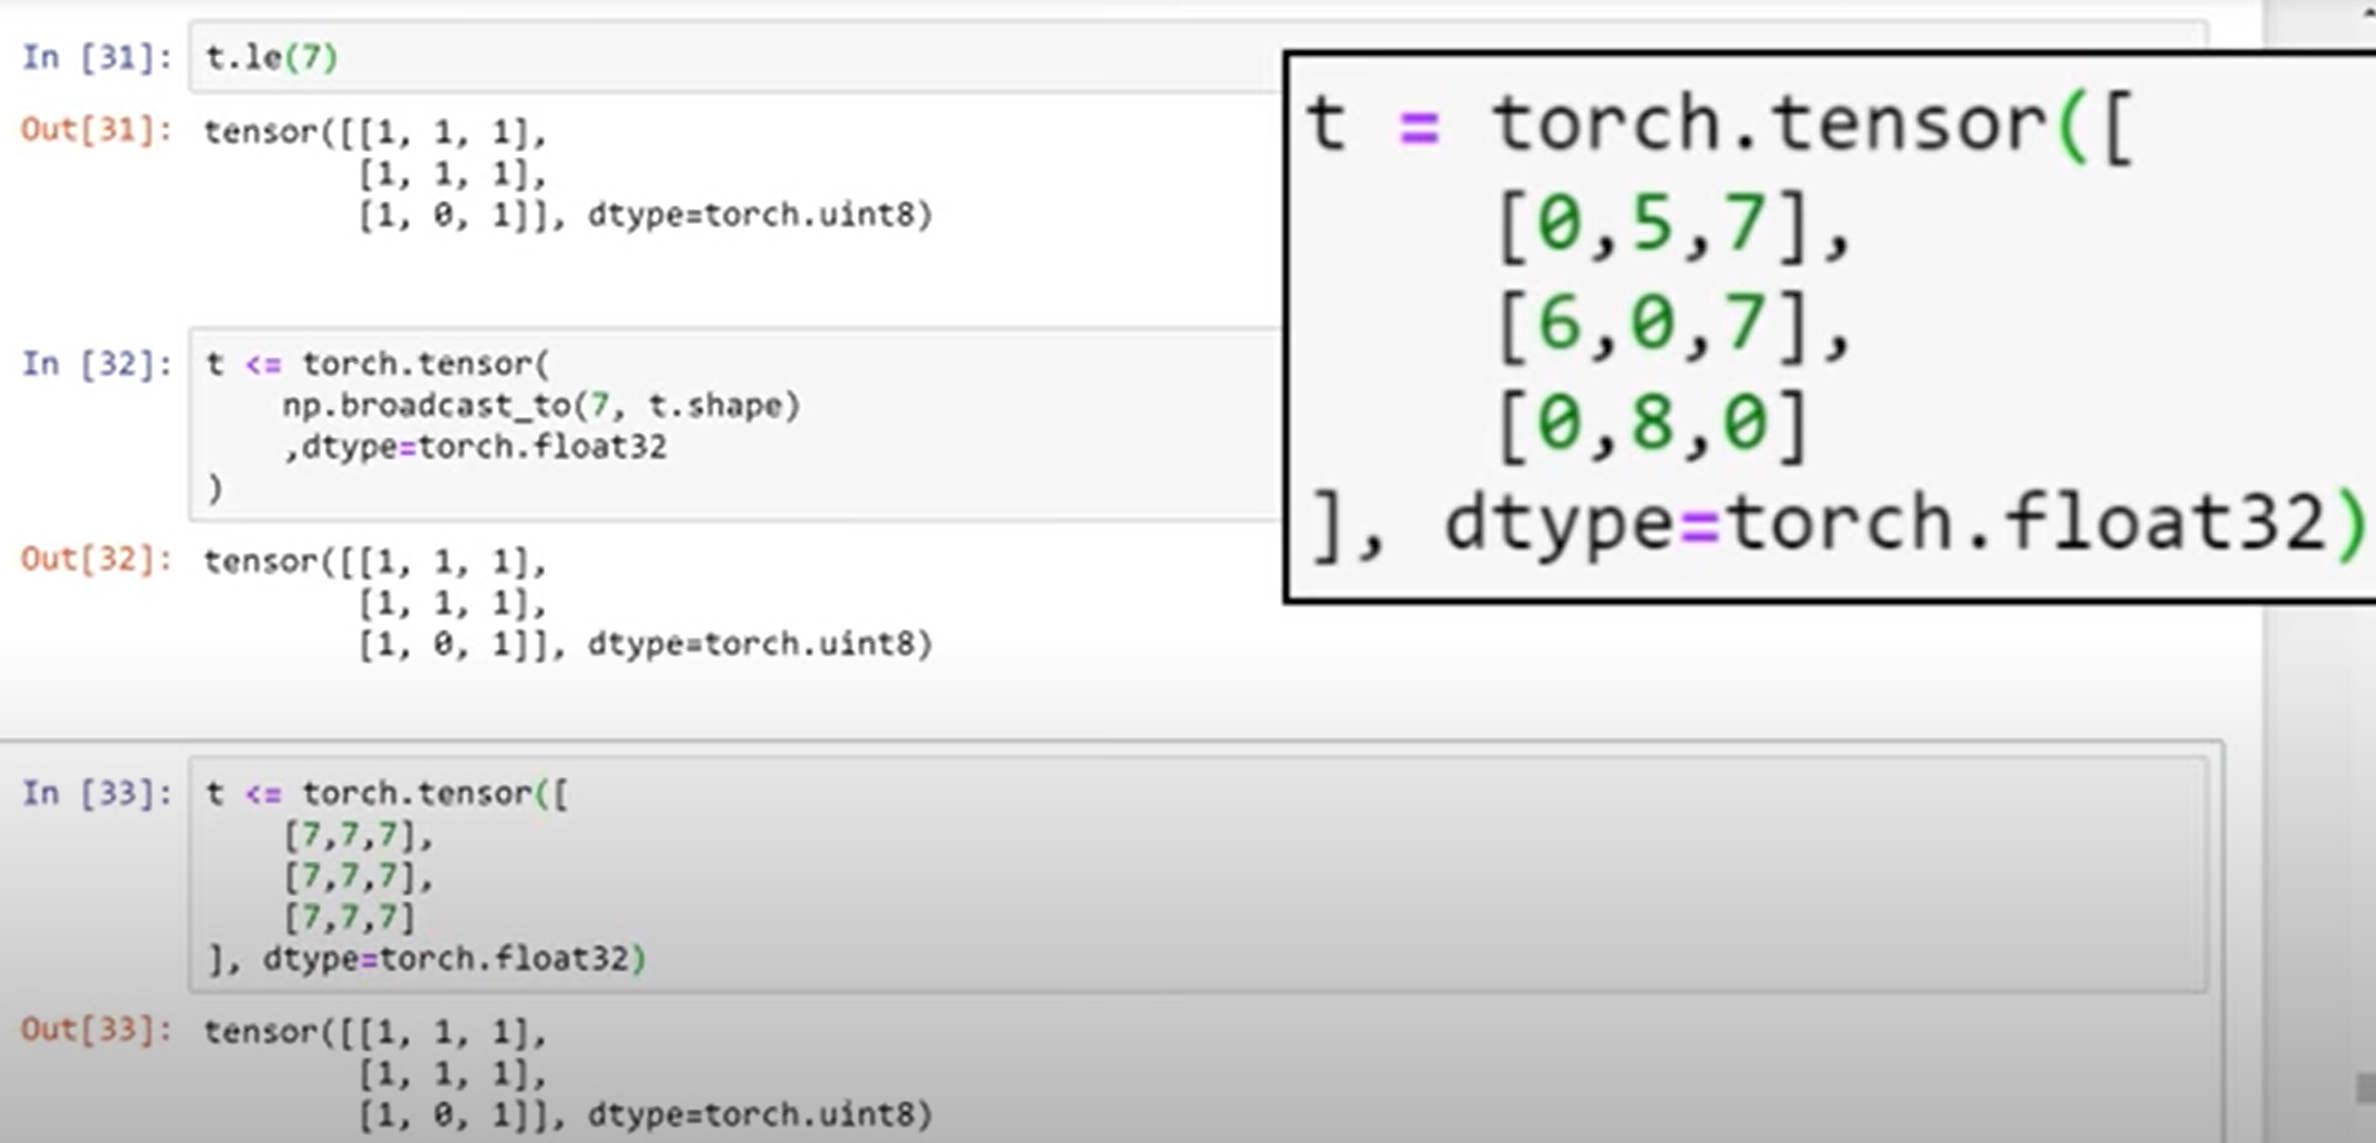

In [69]:
t.abs()

tensor([[0., 5., 7.],
        [6., 0., 7.],
        [0., 8., 0.]])

In [70]:
t.sqrt()

tensor([[0.0000,    nan, 2.6458],
        [2.4495, 0.0000, 2.6458],
        [0.0000, 2.8284, 0.0000]])

In [71]:
t.neg()

tensor([[-0.,  5., -7.],
        [-6., -0., -7.],
        [-0., -8., -0.]])

In [72]:
t.neg().abs()

tensor([[0., 5., 7.],
        [6., 0., 7.],
        [0., 8., 0.]])

## Reduction Operations

Operation that reduces the number of elements in a tensor

In [73]:
import torch

In [75]:
import numpy as np

In [76]:
t = torch.tensor([
    [0,1,0],
    [2,0,2],
    [0,3,0]
], dtype=torch.float32)

In [77]:
t.sum()

tensor(8.)

In [78]:
t.numel()

9

In [79]:
t.sum().numel()

1

In [80]:
t.sum().numel() < t.numel()

True

In [81]:
t.sum()

tensor(8.)

In [82]:
t.prod()

tensor(0.)

In [83]:
t.mean()

tensor(0.8889)

In [85]:
t.std()

tensor(1.1667)

In [86]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)

In [92]:
# Sum down each column
t.sum(dim=0)

tensor([6., 6., 6., 6.])

In [93]:
# Sum across each row
t.sum(dim=1)

tensor([ 4.,  8., 12.])

In [94]:
t[0].sum()

tensor(4.)

In [99]:
t[1].sum()

tensor(8.)

In [100]:
t[2].sum()

tensor(12.)

In [101]:
t.sum(dim=1)

tensor([ 4.,  8., 12.])

Argmax - index of max location in a tensor

In [102]:
t = torch.tensor([
    [1,0,0,2],
    [0,3,3,0],
    [4,0,0,5]
], dtype=torch.float32)

In [107]:
# Max Value
t.max()

tensor(5.)

In [108]:
# Returns index of largest value of the flattened tensor
t.argmax()

tensor(11)

In [109]:
t.flatten()

tensor([1., 0., 0., 2., 0., 3., 3., 0., 4., 0., 0., 5.])

In [110]:
t.max(dim=0)

torch.return_types.max(
values=tensor([4., 3., 3., 5.]),
indices=tensor([2, 1, 1, 2]))

In [111]:
t.argmax(dim=0)

tensor([2, 1, 1, 2])

In [113]:
t.max(dim=1)

torch.return_types.max(
values=tensor([2., 3., 5.]),
indices=tensor([3, 1, 3]))

In [114]:
t.argmax(dim=1)

tensor([3, 1, 3])

In [116]:
t = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]
], dtype=torch.float32)

In [118]:
t.mean()

tensor(5.)

In [119]:
t.mean().item()

5.0

In [120]:
t.mean(dim=0).tolist()

[4.0, 5.0, 6.0]

In [122]:
t.mean(dim=0).numpy()

array([4., 5., 6.], dtype=float32)

# Fashion MNIST DATASET

## Prepare the data (ETL Process - Extract, Transform, Load)

In [124]:
import torch
import torchvision
import torchvision.transforms as transforms

1. Extract - Get the Fashion-MNIST image data

2. Transform - put into tensor form

3. Load - put into an object

Example of extending the dataset class which can be passed to a data loader but FMNIST dataset has one built in

In [126]:
train_set = torchvision.datasets.FashionMNIST (
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()
    ])
)

In [128]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

In [129]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120)

In [130]:
len(train_set)

60000

In [131]:
# 0-9 are the classifications
train_set.train_labels

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [132]:
train_set.train_labels.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [133]:
sample = next(iter(train_set))

In [134]:
len(sample)

2

In [135]:
type(sample)

tuple

In [143]:
image, label = sample

In [144]:
image.shape

torch.Size([1, 28, 28])

label: 9


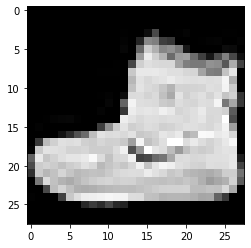

In [147]:
plt.imshow(image.squeeze(), cmap='gray')
print('label:', label)

In [148]:
batch = next(iter(train_loader))

In [149]:
len(batch)

2

In [150]:
type(batch)

list

In [152]:
images, labels = batch

In [153]:
images.shape

torch.Size([10, 1, 28, 28])

In [155]:
labels.shape

torch.Size([10])

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


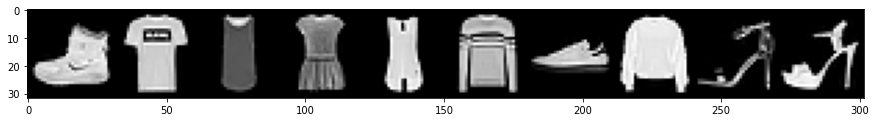

In [157]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels:', labels)

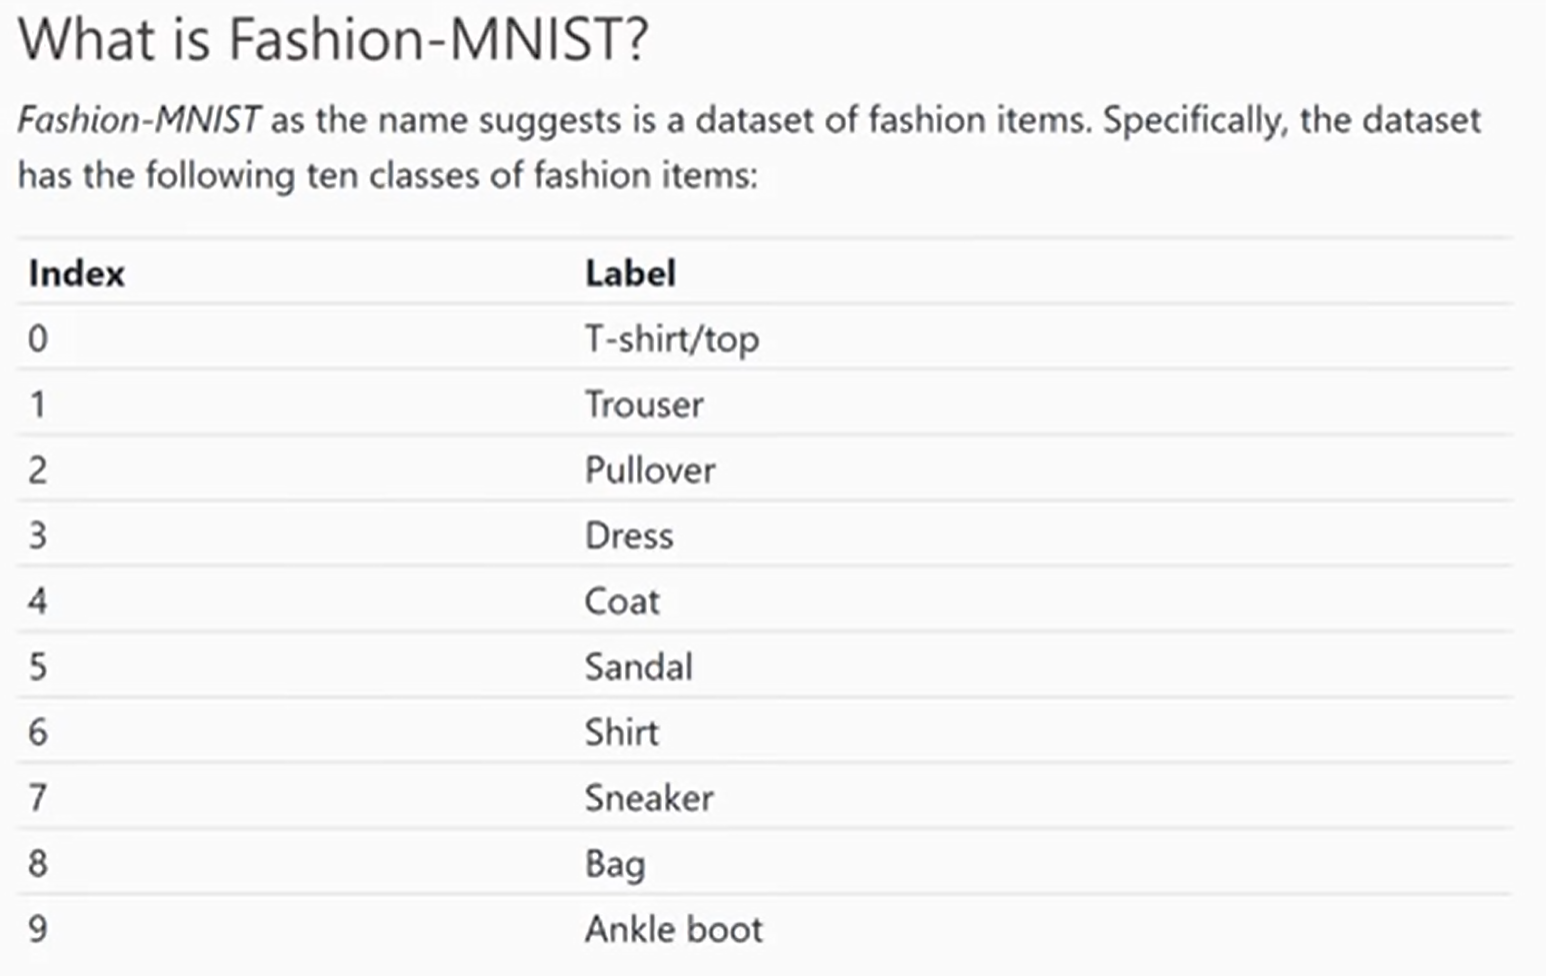

## Build the model

In [2]:
class Lizard:
  def __init__(self, name):
    self.name = name

  def set_name(self, name):
    self.name = name

In [3]:
lizard = Lizard('deep')
print(lizard.name)

deep


In [4]:
lizard.set_name('lizard')
print(lizard.name)

lizard


In [ ]:
# class OHLC(Dataset):
#   def _init_(self, csv_file):
#     self.data = pd.read_csv(csv_file)

#   def __getitem_(self, index):
#     r = self.data.iloc[index]
#     label = torch.tensor(r.is_up day, dtype=torch. long)
#     sample = self.normalize(torch.tensor([r.open, r.high, r.low, r.close]))
#     return sample, label

#   def __len_(self):
#     return len(self.data)

In [3]:
import torch.nn as nn

In [ ]:
# Layers have two components: Transformation and Weights

In [42]:
class Network(nn.Module):
  def __init__(self):
      super(Network, self).__init__()
      self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
      # 1 represents the color dimension (1 = greyscale)
      self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
      # Increase out_channels over colvultion layers

      self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
      self.fc2 = nn.Linear(in_features=120, out_features=60)
      self.out = nn.Linear(in_features=68, out_features=10)
      # Decrease out_features over linear layers to output (10 = classes)

  def forward(self, t):
      #implement the forward pass
      return t

  # def __repr__(self):
  #     # string representation overwritting default
  #     return 'lizardnet'

Linear Layer Parameters: in_features, out_features

Convolution Layer Parameters: in_channels, out_channels, and kernel size
*   kernel_size - sets the size of the filter
*   out_channels - sets the number of filters. One filter produces one output channel
*   out_features - sets the size of the output tensor





In [43]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=68, out_features=10, bias=True)
)

In [26]:
network.conv1

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))

In [27]:
network.conv2

Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))

In [28]:
network.fc2

Linear(in_features=120, out_features=60, bias=True)

In [29]:
network.out

Linear(in_features=68, out_features=10, bias=True)

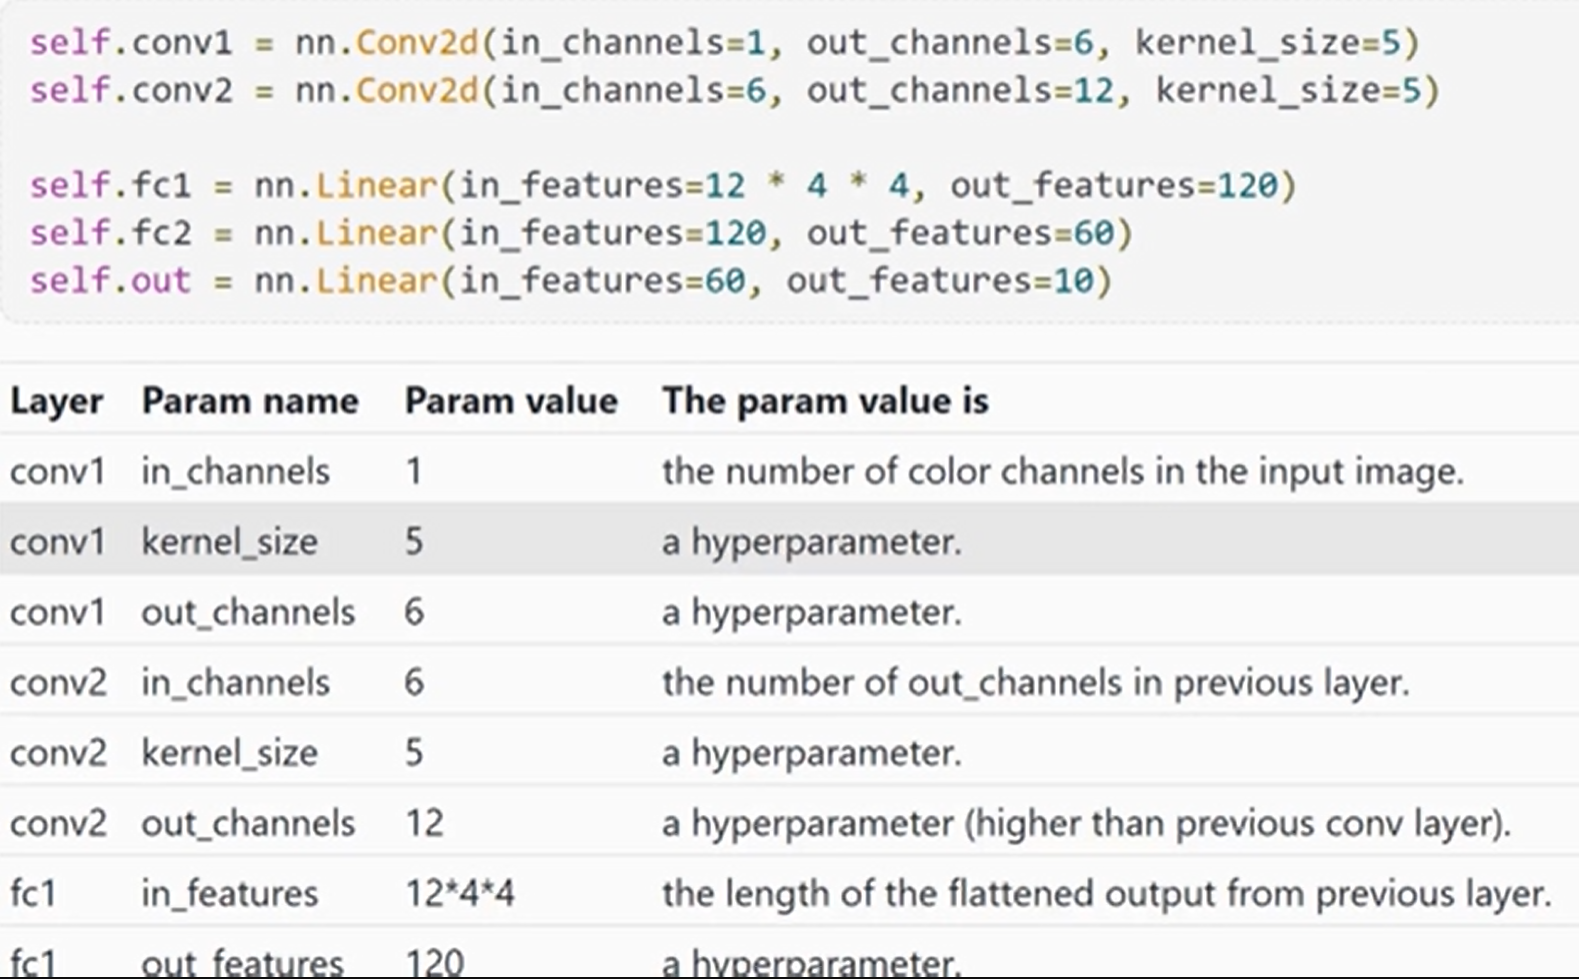

In [30]:
network.conv1.weight

Parameter containing:
tensor([[[[ 0.1848, -0.0353, -0.0458, -0.1413,  0.1840],
          [ 0.0109,  0.0792, -0.1396,  0.1573,  0.0813],
          [ 0.0939,  0.1895,  0.0863,  0.0117,  0.1766],
          [ 0.1730,  0.0245,  0.0532, -0.0199,  0.1809],
          [ 0.1470, -0.1284, -0.1556,  0.1859, -0.1083]]],


        [[[ 0.0695,  0.0089,  0.0876,  0.0640,  0.0316],
          [-0.0709,  0.1792, -0.1591,  0.1446,  0.1154],
          [ 0.0436, -0.0981,  0.1567, -0.1175,  0.0817],
          [ 0.1450, -0.0554, -0.0742, -0.1592,  0.0946],
          [-0.1059,  0.0850,  0.0211, -0.0444, -0.0113]]],


        [[[-0.0208,  0.1834,  0.0022, -0.1061,  0.0716],
          [-0.1168,  0.0636, -0.1955, -0.1381, -0.0753],
          [ 0.0324, -0.0713, -0.1221, -0.1500, -0.1540],
          [-0.1817,  0.1366,  0.0787,  0.0514, -0.1278],
          [ 0.0953, -0.0251, -0.1096,  0.0234, -0.1270]]],


        [[[-0.0816,  0.1503, -0.1538,  0.0459, -0.0724],
          [-0.1655,  0.1036,  0.0853, -0.0941, -0.0039

Learnable parameters -> weights

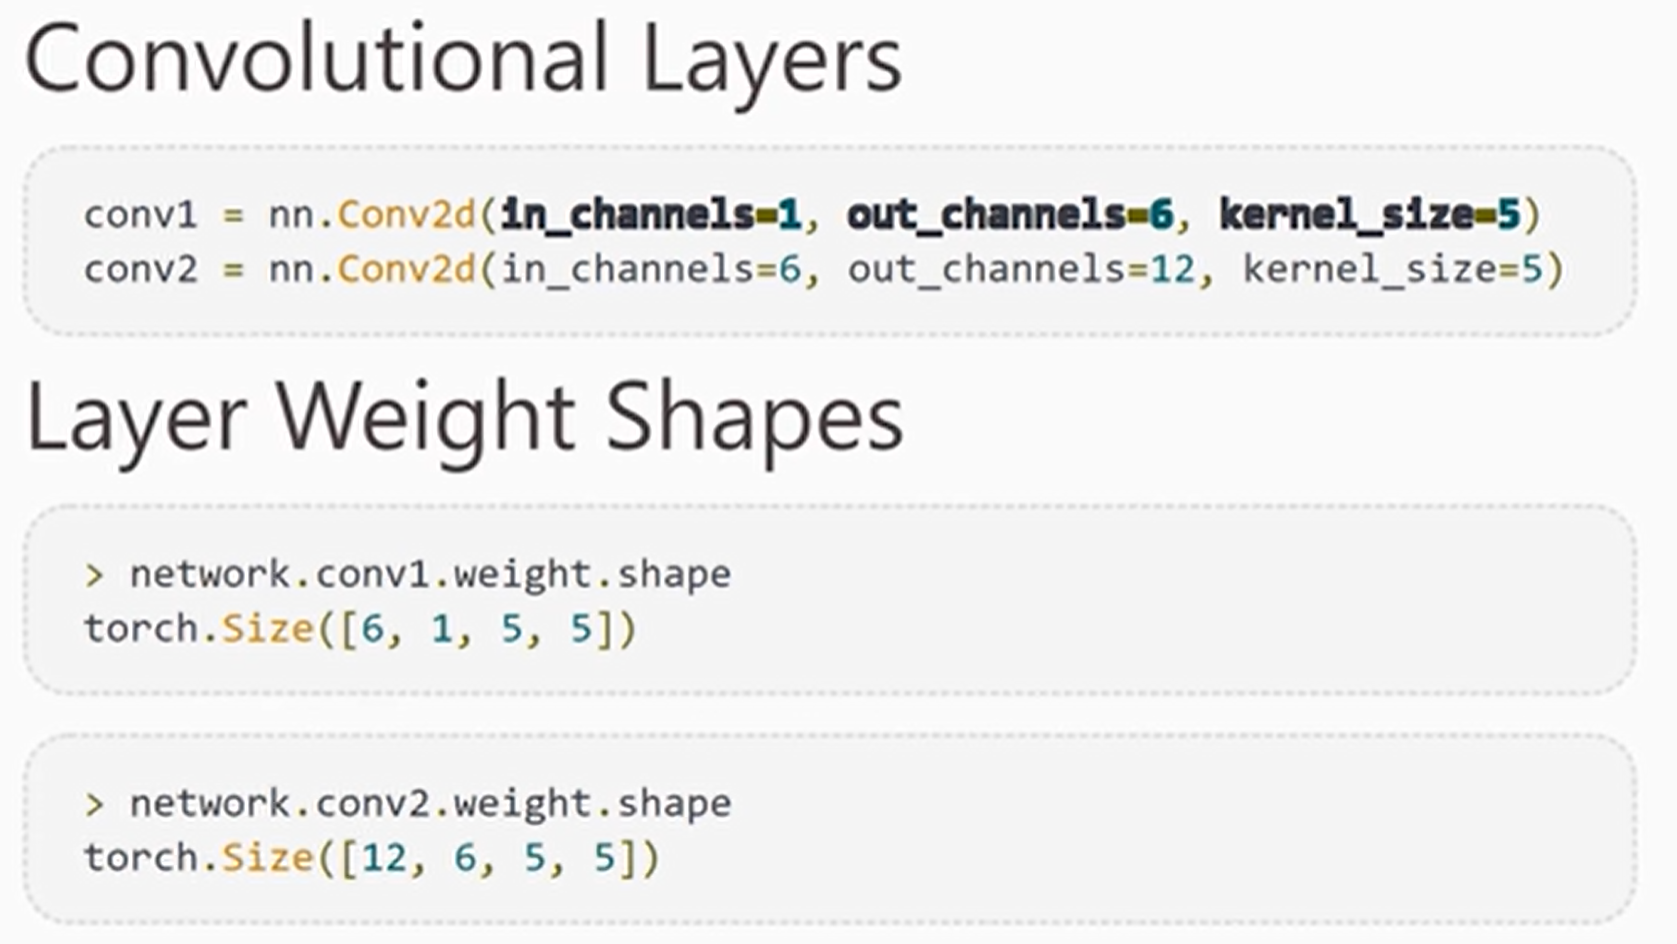

In [31]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

In [32]:
network.conv2.weight.shape

torch.Size([12, 6, 5, 5])

In [44]:
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=68, out_features=10, bias=True)
)


In [33]:
network.fc1.weight.shape

torch.Size([120, 192])

In [34]:
network.fc2.weight.shape

torch.Size([60, 120])

In [35]:
network.out.weight.shape

torch.Size([10, 68])

In [46]:
for param in network.parameters():
    print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 68])
torch.Size([10])


In [47]:
for name, param in network.named_parameters():
    print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 68])
out.bias 		 torch.Size([10])
